### Anomaly Detection - Continuous Probabilistic Methods Exercises

Define a function named get_lower_and_upper_bounds that has two arguments. The first argument is a pandas Series. The second argument is the multiplier, which should have a default argument of 1.5.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
def get_lower_and_upper_bounds_tr(x, y = 1.5):
    '''
    This function takes in two arguments and applies the Interquartile Range Rule.
    The first argument is a pandas series and the second is a default multiplier 
    of 1.5 (Tukey's rule).
    '''

    # breaking out the data into quartiles
    q1 = x.quantile(.25)
    q3 = x.quantile(.75)

    # determining what the interquartile range is
    iqr = q3 - q1

    # assigning bounds to variables
    lower_fence = q1 - y * iqr
    upper_fence = q3 + y * iqr

    return lower_fence, upper_fence

1. Using lemonade.csv dataset and focusing on continuous variables:

- Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?

- Use the IQR Range Rule and the upper and upper bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these upper outliers make sense? Which outliers should be kept?

In [3]:
df = pd.read_csv('lemonade.csv')
df.rename(columns = str.lower, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         365 non-null    object 
 1   day          365 non-null    object 
 2   temperature  365 non-null    float64
 3   rainfall     365 non-null    float64
 4   flyers       365 non-null    int64  
 5   price        365 non-null    float64
 6   sales        365 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 20.1+ KB


In [6]:
df.head()

,date,day,temperature,rainfall,flyers,price,sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [15]:
# let's add an empty dataframe to store the lower and upper bounds
inner_bounds_df = pd.DataFrame(columns = ['feature', 'lower_bound', 'upper_bound'])

for column in df.select_dtypes(exclude = 'object'):
    lower, upper = get_lower_and_upper_bounds_tr(df[column])
    l_df = {'feature':column, 'lower_bound':lower, 'upper_bound':upper}
    inner_bounds_df = inner_bounds_df.append(l_df, ignore_index = True)
    
inner_bounds_df.T

,0,1,2,3,4
feature,temperature,rainfall,flyers,price,sales
lower_bound,16.7,0.26,4.0,0.5,5.0
upper_bound,104.7,1.3,76.0,0.5,45.0


In [32]:
df.select_dtypes(exclude = 'object').describe().T

,count,mean,std,min,25%,50%,75%,max
temperature,365.0,61.224658,18.085892,15.1,49.70,61.10,71.70,212.0
rainfall,365.0,0.825973,0.273890,0.4,0.65,0.74,0.91,2.5
flyers,365.0,40.104110,13.786445,-38.0,31.00,39.00,49.00,80.0
price,365.0,0.500000,0.000000,0.5,0.50,0.50,0.50,0.5
sales,365.0,27.865753,30.948132,7.0,20.00,25.00,30.00,534.0


 - Depending on the location, both bounds for temperature look fine.
 - Everything else looks ok with the exception of the flyers at 76.

 - Using the multiplier of 3, IQR Range Rule, and the lower bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense? Which outliers should be kept?

 - Using the multiplier of 3, IQR Range Rule, and the upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

In [16]:
def get_lower_and_upper_bounds_non_tr(x, y = 3.0):
    '''
    This function takes in two arguments and applies the Interquartile Range Rule.
    The first argument is a pandas series and the second is a default multiplier 
    of 1.5 (Tukey's rule).
    '''

    # breaking out the data into quartiles
    q1 = x.quantile(.25)
    q3 = x.quantile(.75)

    # determining what the interquartile range is
    iqr = q3 - q1

    # assigning bounds to variables
    lower_fence = q1 - y * iqr
    upper_fence = q3 + y * iqr

    return lower_fence, upper_fence

In [17]:
# let's add an empty dataframe to store the lower and upper bounds
outer_bounds_df = pd.DataFrame(columns = ['feature', 'lower_bound', 'upper_bound'])

for column in df.select_dtypes(exclude = 'object'):
    lower, upper = get_lower_and_upper_bounds_non_tr(df[column])
    l_df = {'feature':column, 'lower_bound':lower, 'upper_bound':upper}
    outer_bounds_df = outer_bounds_df.append(l_df, ignore_index = True)
    
outer_bounds_df.T

,0,1,2,3,4
feature,temperature,rainfall,flyers,price,sales
lower_bound,-16.3,-0.13,-23.0,0.5,-10.0
upper_bound,137.7,1.69,103.0,0.5,60.0


- Depending on location, the bounds for temperature look extreme
- Rainfall having a negative lower bound does not make sense.
- Flyers having a negative lower bound also doesn't make sense and 103 flyers seems excessive.
- Negative sales do not make sense unless over twenty people requested refunds and there were no sales that day.

2. Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:

- Use a 2 sigma decision rule to isolate the outliers.

 - Do these make sense?

 - Should certain outliers be kept or removed?

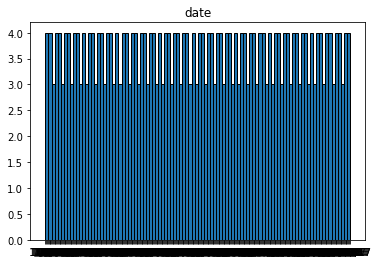

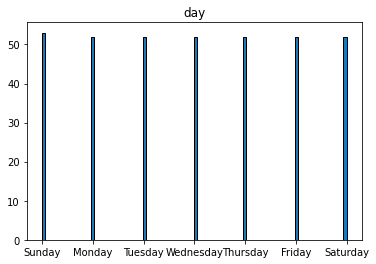

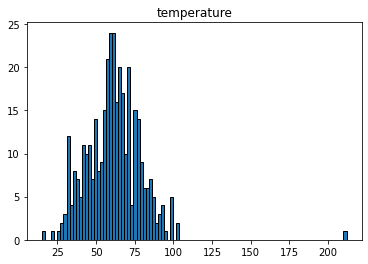

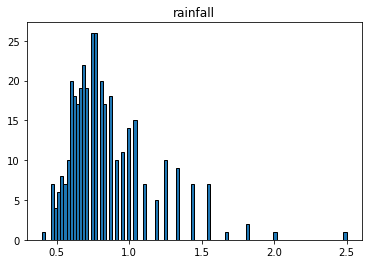

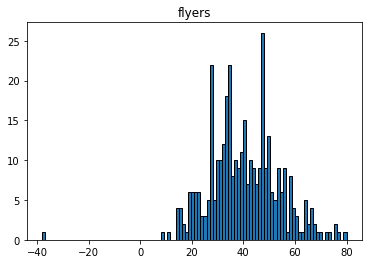

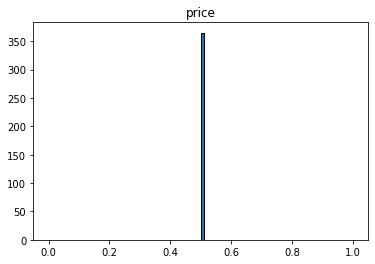

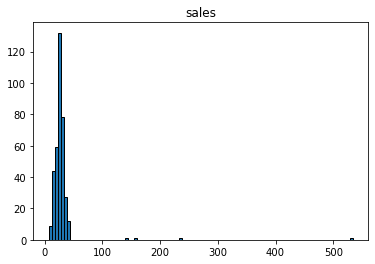

In [34]:
# let's figure out which features are normally distributed
for col in df:
    plt.title(col)
    plt.hist(df[col], bins = 100, ec = 'black')
    plt.show()

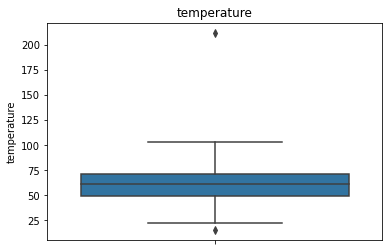

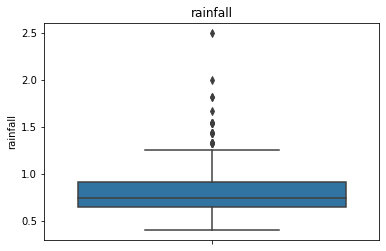

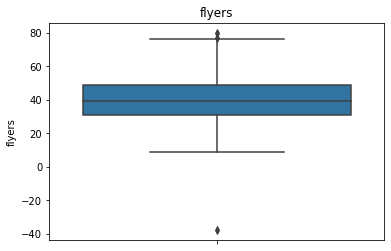

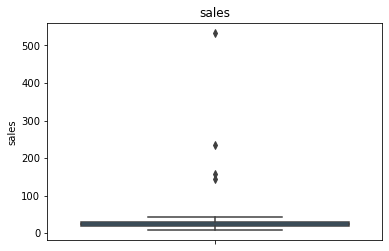

In [35]:
# for columns that are normally distributed, let's see what their boxplot looks like: 
for col in df[['temperature', 'rainfall', 'flyers', 'sales']]:
    plt.title(col)
    sns.boxplot(data = df, y = df[col])
    plt.show()

In [36]:
# let's look at the describe of the features that are normally distributed
df[['temperature', 'rainfall', 'flyers', 'sales']].describe().T

,count,mean,std,min,25%,50%,75%,max
temperature,365.0,61.224658,18.085892,15.1,49.70,61.10,71.70,212.0
rainfall,365.0,0.825973,0.273890,0.4,0.65,0.74,0.91,2.5
flyers,365.0,40.104110,13.786445,-38.0,31.00,39.00,49.00,80.0
sales,365.0,27.865753,30.948132,7.0,20.00,25.00,30.00,534.0


In [60]:
# let's create new columns to store the zvalues for the normally distributed columns:
for column in df[['temperature', 'rainfall', 'flyers', 'sales']]:
    df[column+'_zscore'] = (df[column] - df[column].mean())/df[column].std()

In [66]:
df[df['temperature_zscore'].abs() >= 2]

,date,day,temperature,rainfall,flyers,price,sales,temperature_zscore,rainfall_zscore,flyers_zscore,sales_zscore
41,2/11/17,Saturday,212.0,0.91,35,0.5,21,8.336627,0.306792,-0.370227,-0.221847
166,6/16/17,Friday,99.3,0.47,77,0.5,41,2.105251,-1.299691,2.676244,0.424395
176,6/26/17,Monday,102.6,0.47,60,0.5,42,2.287714,-1.299691,1.443149,0.456708
181,7/1/17,Saturday,102.9,0.47,59,0.5,143,2.304301,-1.299691,1.370614,3.720233
190,7/10/17,Monday,98.0,0.49,66,0.5,40,2.033372,-1.226669,1.878359,0.392083
198,7/18/17,Tuesday,99.3,0.47,76,0.5,41,2.105251,-1.299691,2.603709,0.424395
202,7/22/17,Saturday,99.6,0.47,49,0.5,42,2.121838,-1.299691,0.645264,0.456708
207,7/27/17,Thursday,97.9,0.47,74,0.5,43,2.027843,-1.299691,2.458639,0.489020
338,12/5/17,Tuesday,22.0,1.82,11,0.5,10,-2.168799,3.629291,-2.111067,-0.577281
364,12/31/17,Sunday,15.1,2.50,9,0.5,7,-2.550311,6.112037,-2.256137,-0.674217


- The temperature seems fine according to the date with the exception of the 212 temperature value from 2/11/17.

In [71]:
df[df['rainfall_zscore'].abs() >= 2]

,date,day,temperature,rainfall,flyers,price,sales,temperature_zscore,rainfall_zscore,flyers_zscore,sales_zscore
0,1/1/17,Sunday,27.0,2.00,15,0.5,10,-1.892340,4.286488,-1.820927,-0.577281
5,1/6/17,Friday,25.3,1.54,23,0.5,11,-1.986336,2.606983,-1.240647,-0.544968
6,1/7/17,Saturday,32.9,1.54,19,0.5,13,-1.566119,2.606983,-1.530787,-0.480344
10,1/11/17,Wednesday,32.6,1.54,23,0.5,12,-1.582706,2.606983,-1.240647,-0.512656
15,1/16/17,Monday,30.6,1.67,24,0.5,12,-1.693290,3.081626,-1.168112,-0.512656
16,1/17/17,Tuesday,32.2,1.43,26,0.5,14,-1.604823,2.205363,-1.023042,-0.448032
19,1/20/17,Friday,31.6,1.43,20,0.5,12,-1.637998,2.205363,-1.458252,-0.512656
23,1/24/17,Tuesday,28.6,1.54,20,0.5,12,-1.803873,2.606983,-1.458252,-0.512656
337,12/4/17,Monday,34.9,1.54,16,0.5,13,-1.455535,2.606983,-1.748392,-0.480344
338,12/5/17,Tuesday,22.0,1.82,11,0.5,10,-2.168799,3.629291,-2.111067,-0.577281


- I'm not well versed with the rain values but they look ok with me even though the zscore is above 2

In [72]:
df[df['flyers_zscore'].abs() >= 2]

,date,day,temperature,rainfall,flyers,price,sales,temperature_zscore,rainfall_zscore,flyers_zscore,sales_zscore
166,6/16/17,Friday,99.3,0.47,77,0.5,41,2.105251,-1.299691,2.676244,0.424395
170,6/20/17,Tuesday,85.1,0.54,70,0.5,37,1.320109,-1.044114,2.168499,0.295147
171,6/21/17,Wednesday,94.3,0.47,76,0.5,41,1.828792,-1.299691,2.603709,0.424395
182,7/2/17,Sunday,93.4,0.51,68,0.5,158,1.779030,-1.153647,2.023429,4.204914
183,7/3/17,Monday,81.5,0.54,68,0.5,235,1.121058,-1.044114,2.023429,6.692948
194,7/14/17,Friday,92.0,0.50,80,0.5,40,1.701621,-1.190158,2.893849,0.392083
198,7/18/17,Tuesday,99.3,0.47,76,0.5,41,2.105251,-1.299691,2.603709,0.424395
203,7/23/17,Sunday,89.1,0.51,72,0.5,37,1.541275,-1.153647,2.313569,0.295147
204,7/24/17,Monday,83.5,0.57,69,0.5,35,1.231642,-0.934581,2.095964,0.230523
207,7/27/17,Thursday,97.9,0.47,74,0.5,43,2.027843,-1.299691,2.458639,0.489020


- Definitely the negative flyer value is off.
- Anything above 40 flyers seems excessive to me.

In [73]:
df[df['sales_zscore'].abs() >= 2]

,date,day,temperature,rainfall,flyers,price,sales,temperature_zscore,rainfall_zscore,flyers_zscore,sales_zscore
181,7/1/17,Saturday,102.9,0.47,59,0.5,143,2.304301,-1.299691,1.370614,3.720233
182,7/2/17,Sunday,93.4,0.51,68,0.5,158,1.779030,-1.153647,2.023429,4.204914
183,7/3/17,Monday,81.5,0.54,68,0.5,235,1.121058,-1.044114,2.023429,6.692948
184,7/4/17,Tuesday,84.2,0.59,49,0.5,534,1.270346,-0.861559,0.645264,16.354275


- The sales values look ok to me. 
- At first, without knowing the date, the $500+ sales value seemed off to me but then I can see that it is a holiday so it makes sense there were that many sales with people out and about.

3. Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv

In [74]:
df[df['temperature_zscore'].abs() >= 3]

,date,day,temperature,rainfall,flyers,price,sales,temperature_zscore,rainfall_zscore,flyers_zscore,sales_zscore
41,2/11/17,Saturday,212.0,0.91,35,0.5,21,8.336627,0.306792,-0.370227,-0.221847


- Temperature is too high, probably a mistake inputting the amount.

In [75]:
df[df['rainfall_zscore'].abs() >= 3]

,date,day,temperature,rainfall,flyers,price,sales,temperature_zscore,rainfall_zscore,flyers_zscore,sales_zscore
0,1/1/17,Sunday,27.0,2.00,15,0.5,10,-1.892340,4.286488,-1.820927,-0.577281
15,1/16/17,Monday,30.6,1.67,24,0.5,12,-1.693290,3.081626,-1.168112,-0.512656
338,12/5/17,Tuesday,22.0,1.82,11,0.5,10,-2.168799,3.629291,-2.111067,-0.577281
343,12/10/17,Sunday,31.3,1.82,15,0.5,11,-1.654586,3.629291,-1.820927,-0.544968
364,12/31/17,Sunday,15.1,2.50,9,0.5,7,-2.550311,6.112037,-2.256137,-0.674217


- I'm not well versed with the rain values but they look ok with me even though the zscore is above 2

In [76]:
df[df['flyers_zscore'].abs() >= 3]

,date,day,temperature,rainfall,flyers,price,sales,temperature_zscore,rainfall_zscore,flyers_zscore,sales_zscore
324,11/21/17,Tuesday,47.0,0.95,-38,0.5,20,-0.786506,0.452836,-5.665283,-0.254159


- Negative flyers do not make sense.

In [77]:
df[df['sales_zscore'].abs() >= 3]

,date,day,temperature,rainfall,flyers,price,sales,temperature_zscore,rainfall_zscore,flyers_zscore,sales_zscore
181,7/1/17,Saturday,102.9,0.47,59,0.5,143,2.304301,-1.299691,1.370614,3.720233
182,7/2/17,Sunday,93.4,0.51,68,0.5,158,1.779030,-1.153647,2.023429,4.204914
183,7/3/17,Monday,81.5,0.54,68,0.5,235,1.121058,-1.044114,2.023429,6.692948
184,7/4/17,Tuesday,84.2,0.59,49,0.5,534,1.270346,-0.861559,0.645264,16.354275


- Sales look ok for a hot month and for a 4th of July haul.